The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [146]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!

In [147]:
# Read csv file
data = pd.read_csv('data/nobel.csv')

# Display first five rows
display(data.head())

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [148]:
# Find the top_gender
total_gender_count = data['sex'].value_counts().to_dict()
top_gender = max(total_gender_count)

# Find the top_country
total_country_count = data['organization_country'].value_counts().to_dict()
top_country = max(total_country_count)

print(f"The most commonly awarded gender is {top_gender}\n")
print(f"The most commonly awarded birth country is {top_country}")

The most commonly awarded gender is Male

The most commonly awarded birth country is United States of America


In [149]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
data['us_born_winner'] = data['birth_country'] == 'United States of America'
data['decade'] = (np.floor(data['year']/10)*10).astype('int64')
us_winner = data.groupby('decade', as_index=False)['us_born_winner'].mean()

# Display first 5 rows of the us_winner data
display(us_winner.head())

,decade,us_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326


In [150]:
# Find the highest us_born_winner ratio
highest = max(us_winner['us_born_winner'])

# Next find the decade which had the highest ration of US-born Nobel Prize winner
max_decade_usa = us_winner[us_winner['us_born_winner'] == highest]['decade'].values[0]
print(f"{max_decade_usa} is the decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories")

2000 is the decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories


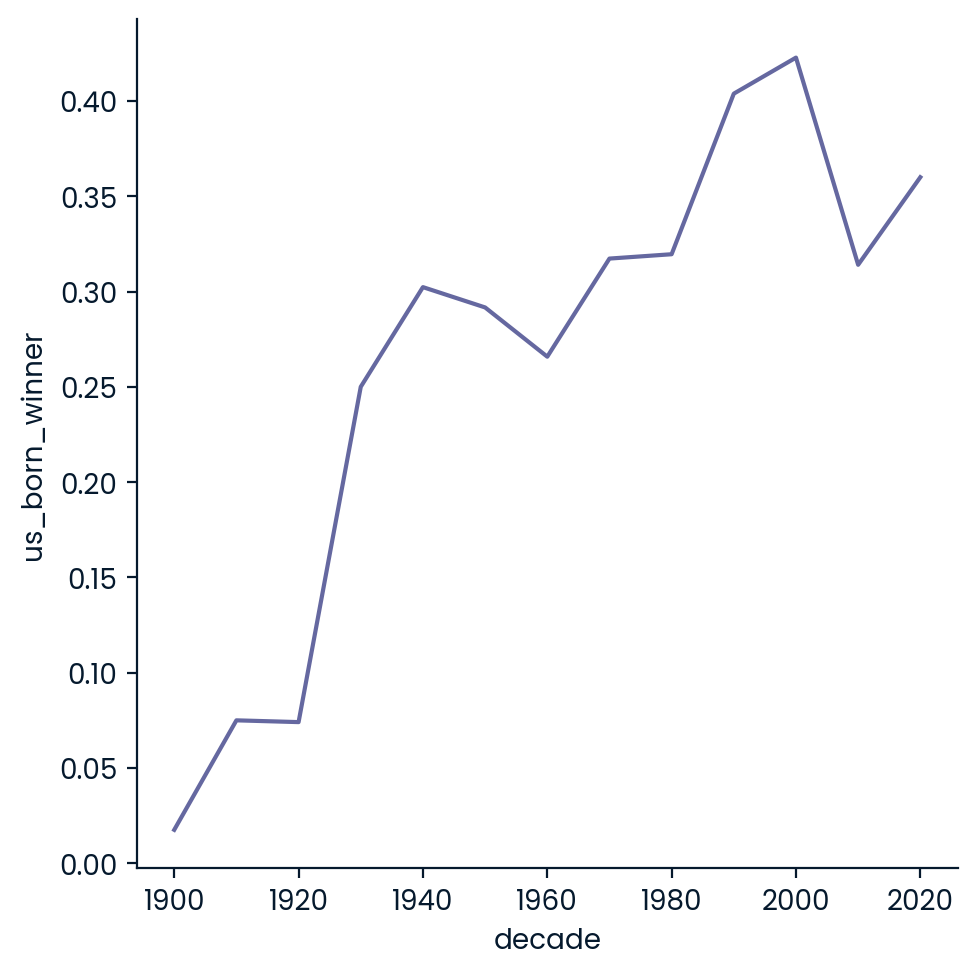

In [151]:
# Create a relational line plot
sns.relplot(x='decade', y='us_born_winner', data=us_winner, kind='line')


In [152]:
# Which decade and Nobel Prize category combination had the highest proportion of female laureates?

# Filtering for female winners
data['female_winners'] = data['sex'] == 'Female'

# Group by two columns
df_female = data.groupby(['decade', 'category'], as_index=False)['female_winners'].mean()

# Find the decade and category with the highest female winners
highest_winner = max(df_female['female_winners'])
max_f_decade = df_female[df_female['female_winners'] == highest_winner]['decade'].values[0]
female_category = df_female[df_female['female_winners'] == highest_winner]['category'].values[0]

# Create a dictionary
max_female_dict = {max_f_decade: female_category}

print(max_female_dict)

{2020: 'Literature'}


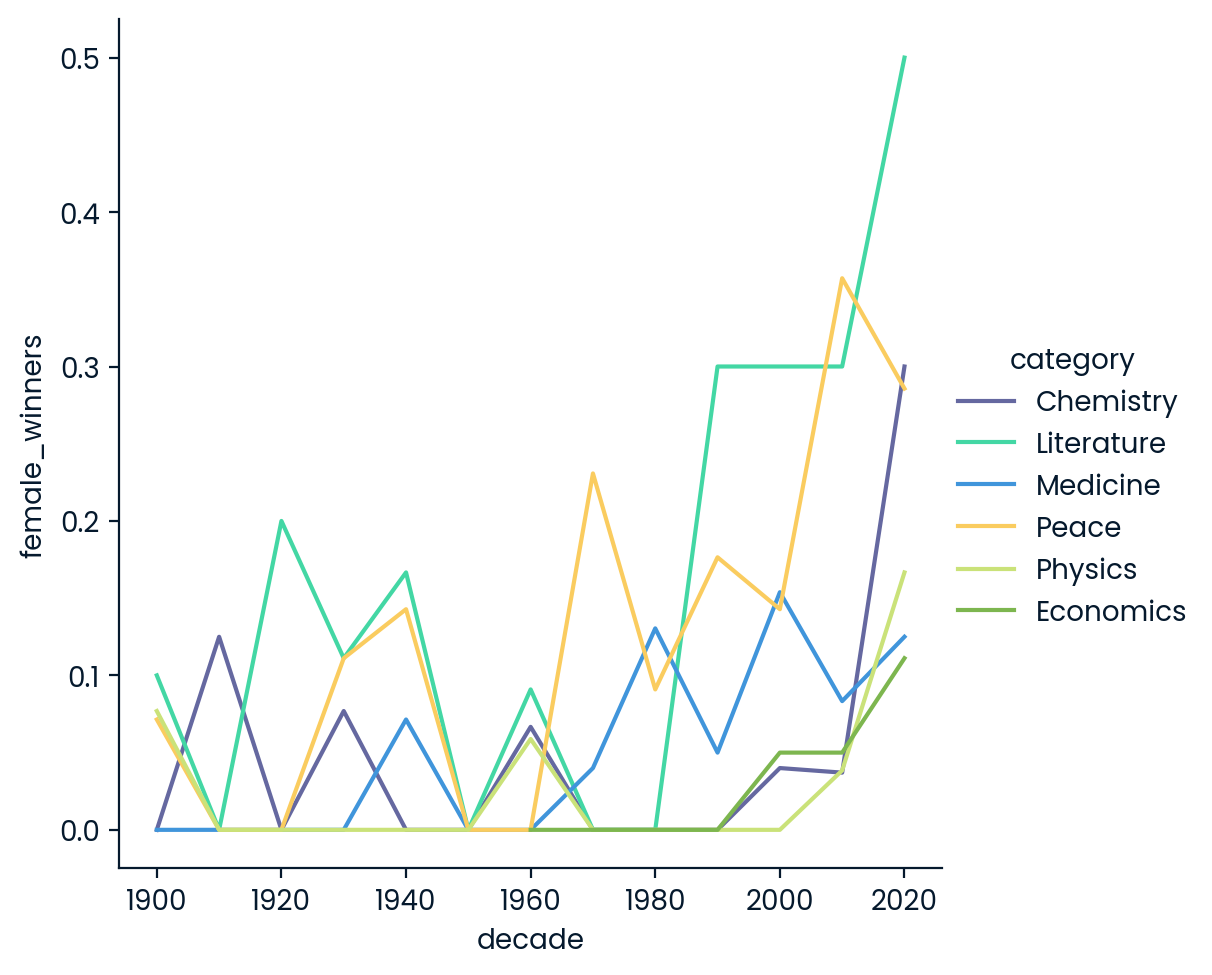

In [153]:
# Create a relational line plot with multiple categories
sns.relplot(x='decade', y='female_winners', data=df_female, hue = 'category' , kind='line')

In [154]:
# Find first woman to win a Nobel Prize and in what category
first_female = data[data['female_winners']]
year_winning = min(first_female['year'])
first_woman_category = first_female[first_female['year'] == year_winning]['category'].values[0]
first_woman_name = first_female[first_female['year'] == year_winning]['full_name'].values[0]

# Print out the results
print(f"The first woman received a Nobel Prize is {first_woman_name} in {first_woman_category} field in {year_winning}")

The first woman received a Nobel Prize is Marie Curie, née Sklodowska in Physics field in 1903


In [155]:
# Determine repeat winners
repeat_winner = pd.DataFrame(data['full_name'].value_counts())
repeat_list = list(repeat_winner[repeat_winner['full_name'] >= 2].index)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']